
PCA:
PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.
Data file - PCA India Data Census.xlsx





# Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_excel ('PCA+India+Data_Census.xlsx')

In [4]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [5]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [6]:
df.shape

(640, 61)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

### there is no missing values or duplicates in the data 

# Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like the given example. Pick 5 variables out of the given 20 variables below.

In [11]:
#check for the states
df["State"].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

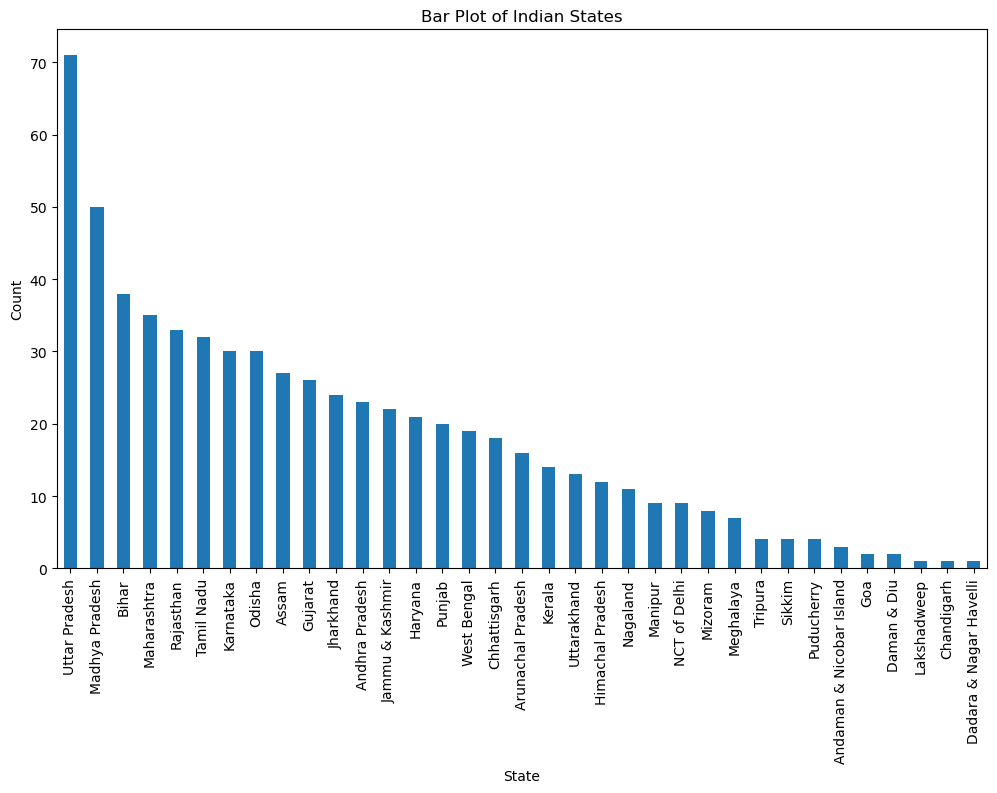

In [12]:
state_counts = df["State"].value_counts()

# Plotting the data
state_counts.plot(kind='bar', figsize=(12, 7))
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Bar Plot of Indian States")
plt.xticks(rotation=90)
plt.show()

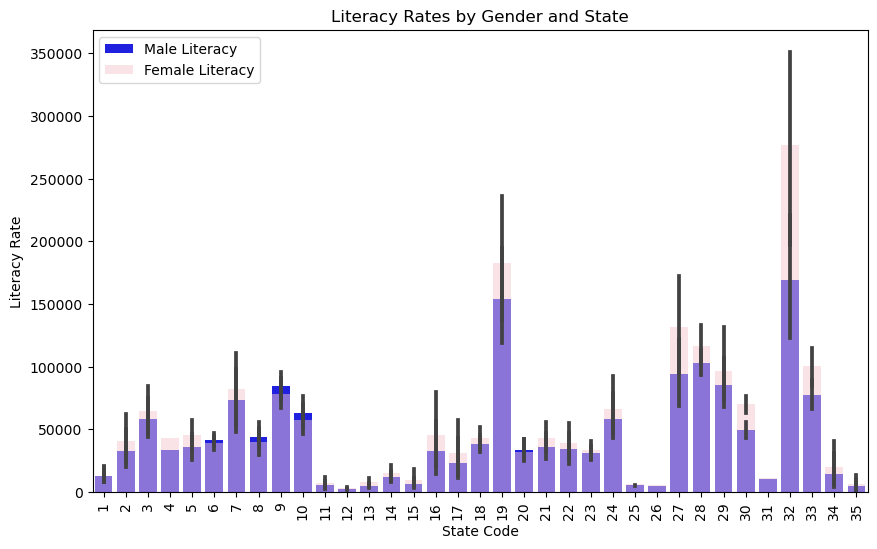

In [13]:

plt.figure(figsize=(10, 6))

# differentiate between Male and Female Literacy
sns.barplot(x='State Code', y='M_LIT', data=df, color='blue', label='Male Literacy')
sns.barplot(x='State Code', y='F_LIT', data=df, color='pink', label='Female Literacy', alpha=0.5)

plt.title('Literacy Rates by Gender and State')
plt.xlabel('State Code')
plt.ylabel('Literacy Rate')
plt.legend()
plt.xticks(rotation=90)
plt.show()


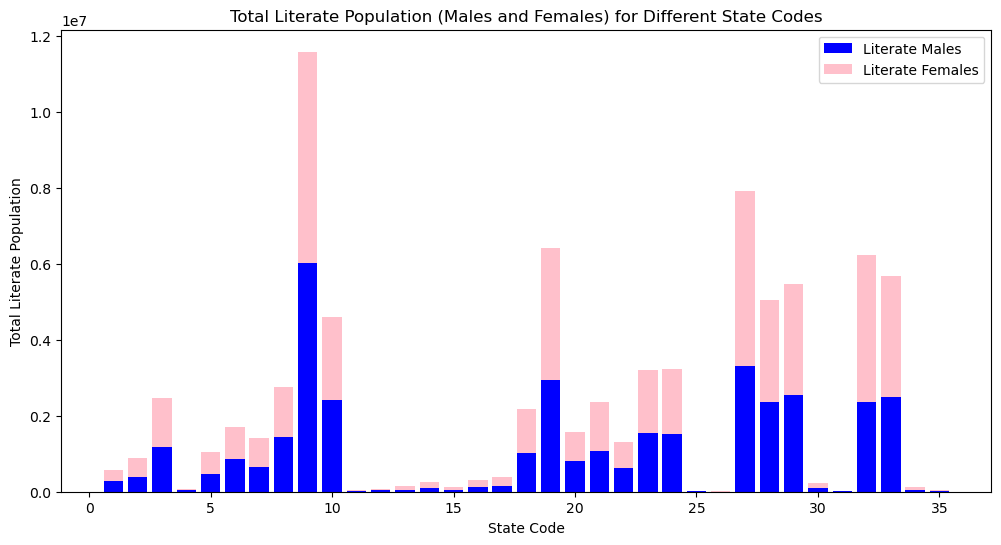

In [14]:
plt.figure(figsize=(12, 6))

# Grouping by State Code and summing up the literate populations for males and females
df_grouped = df.groupby('State Code')['M_LIT', 'F_LIT'].sum().reset_index()

# Plotting total literate males and females together
plt.bar(df_grouped['State Code'], df_grouped['M_LIT'], color='blue', label='Literate Males')
plt.bar(df_grouped['State Code'], df_grouped['F_LIT'], color='pink', bottom=df_grouped['M_LIT'], label='Literate Females')

plt.xlabel('State Code')
plt.ylabel('Total Literate Population')
plt.title('Total Literate Population (Males and Females) for Different State Codes')
plt.legend()
plt.show()

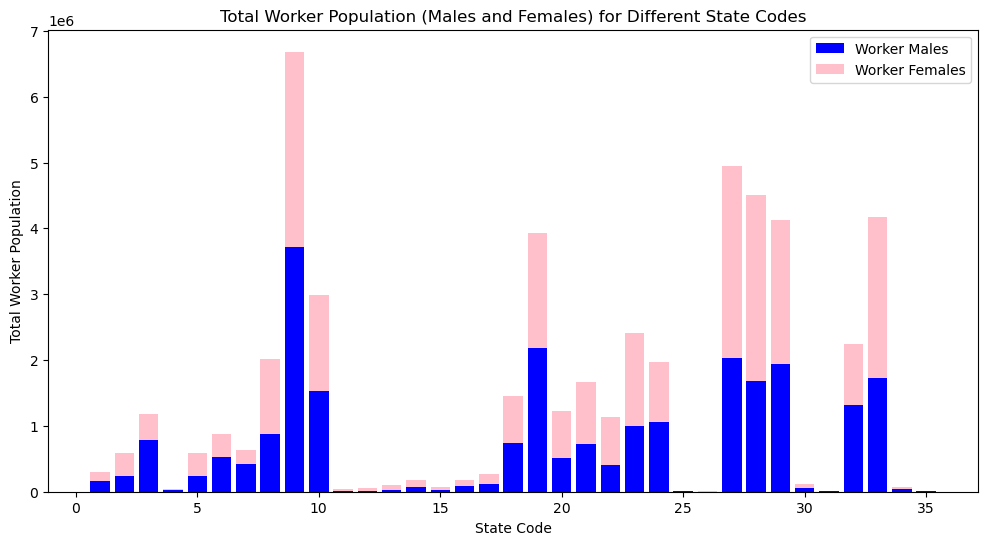

In [15]:

plt.figure(figsize=(12, 6))

# Grouping by State Code and summing up the worker populations for males and females
df_grouped = df.groupby('State Code')['TOT_WORK_M', 'TOT_WORK_F'].sum().reset_index()

# Plotting total worker populations for males and females together
plt.bar(df_grouped['State Code'], df_grouped['TOT_WORK_M'], color='blue', label='Worker Males')
plt.bar(df_grouped['State Code'], df_grouped['TOT_WORK_F'], color='pink', bottom=df_grouped['TOT_WORK_M'], label='Worker Females')

plt.xlabel('State Code')
plt.ylabel('Total Worker Population')
plt.title('Total Worker Population (Males and Females) for Different State Codes')
plt.legend()
plt.show()


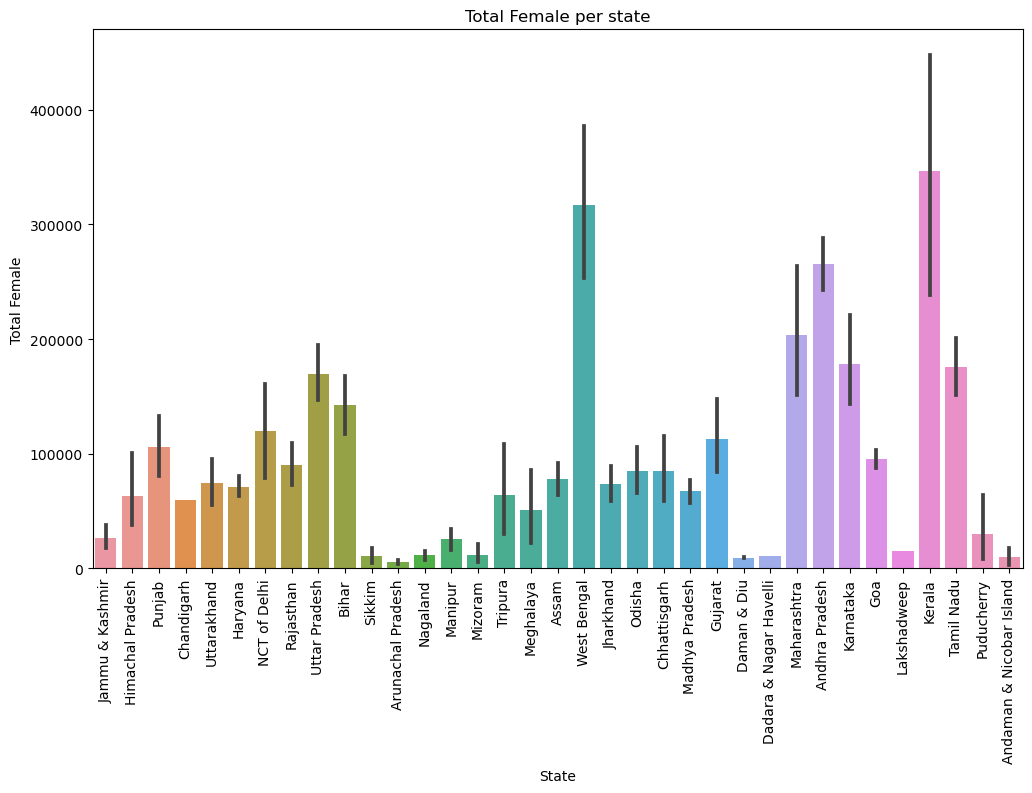

In [16]:
plt.figure(figsize=(12, 7))
sns.barplot(x="State", y="TOT_F", data=df);
plt.xlabel("State")
plt.ylabel("Total Female")
plt.title("Total Female per state")
plt.xticks(rotation=90)
plt.show()
plt.show()


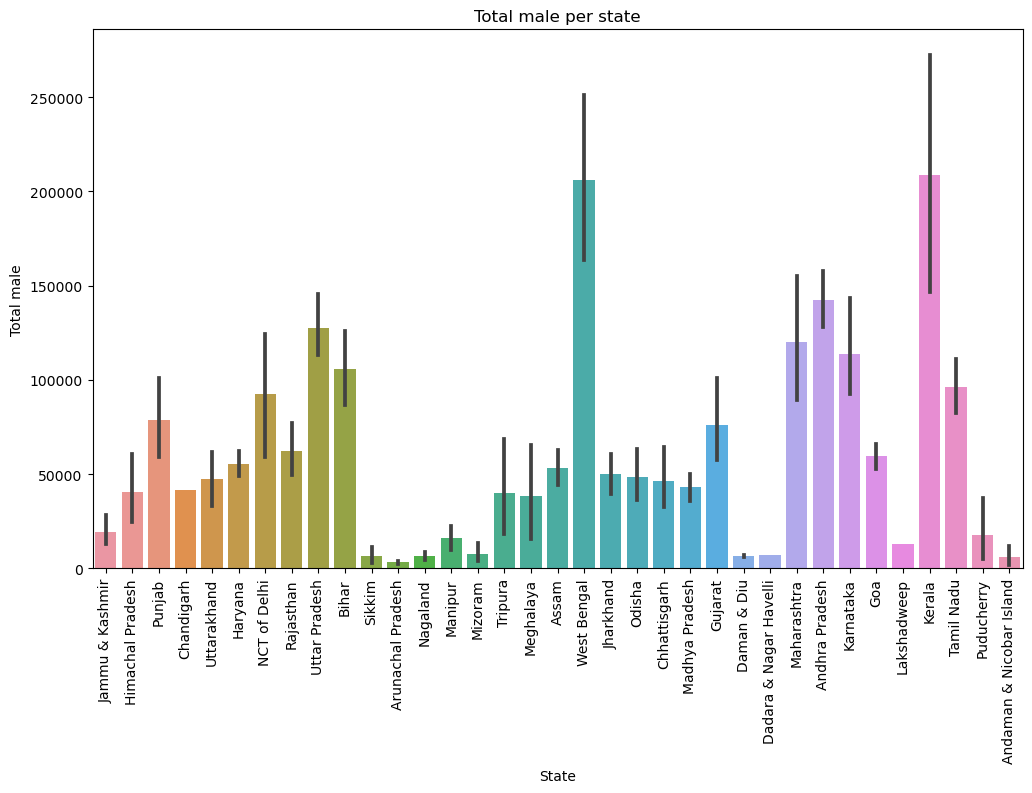

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(x="State", y="TOT_M", data=df);
plt.xlabel("State")
plt.ylabel("Total male")
plt.title("Total male per state")
plt.xticks(rotation=90)
plt.show()

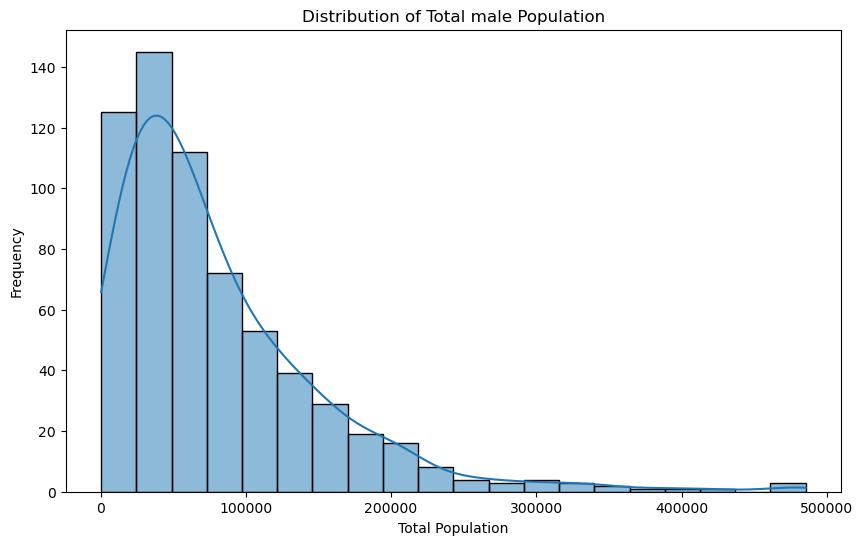

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOT_M'], bins=20, kde=True)
plt.title('Distribution of Total male Population')
plt.xlabel('Total Population')
plt.ylabel('Frequency')
plt.show()




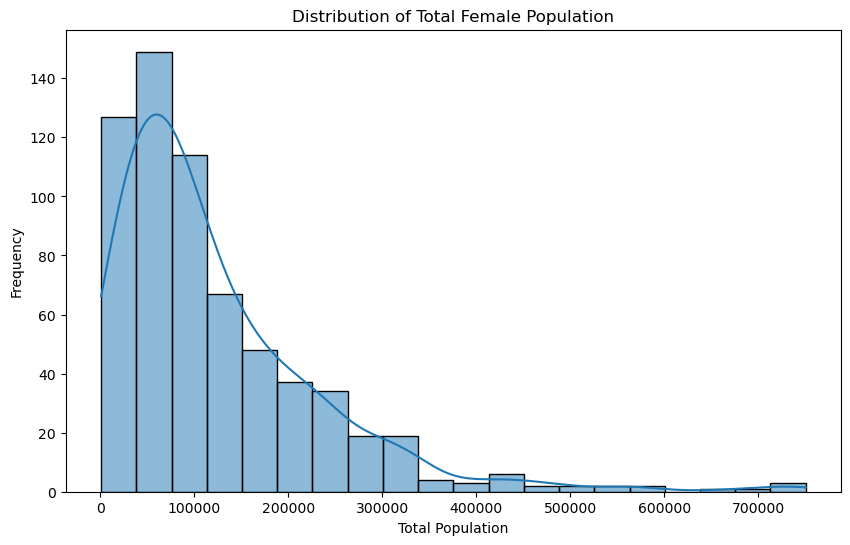

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TOT_F'], bins=20, kde=True)
plt.title('Distribution of Total Female Population')
plt.xlabel('Total Population')
plt.ylabel('Frequency')
plt.show()


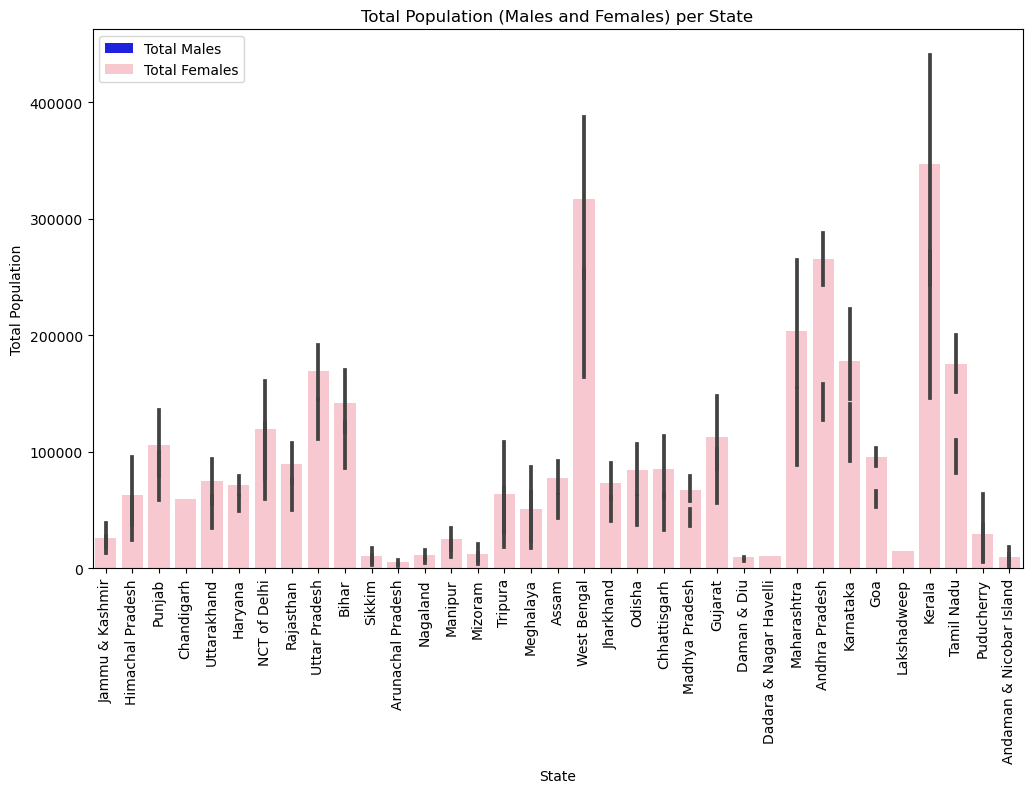

In [20]:

plt.figure(figsize=(12, 7))

# Plotting total males and females together
sns.barplot(x="State", y="TOT_M", data=df, color='blue', label='Total Males')
sns.barplot(x="State", y="TOT_F", data=df, color='pink', label='Total Females')

plt.xlabel("State")
plt.ylabel("Total Population")
plt.title("Total Population (Males and Females) per State")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
df['TOT_M'].sum()

print("There are a Total of",df['TOT_M'].sum(),"Males in the dataset.")

df['TOT_F'].sum()

print("There are a Total of",df['TOT_F'].sum(),"Females in the dataset.")

There are a Total of 51161969 Males in the dataset.
There are a Total of 78318134 Females in the dataset.


### we can notice that the female population in every state is higher than that of male 

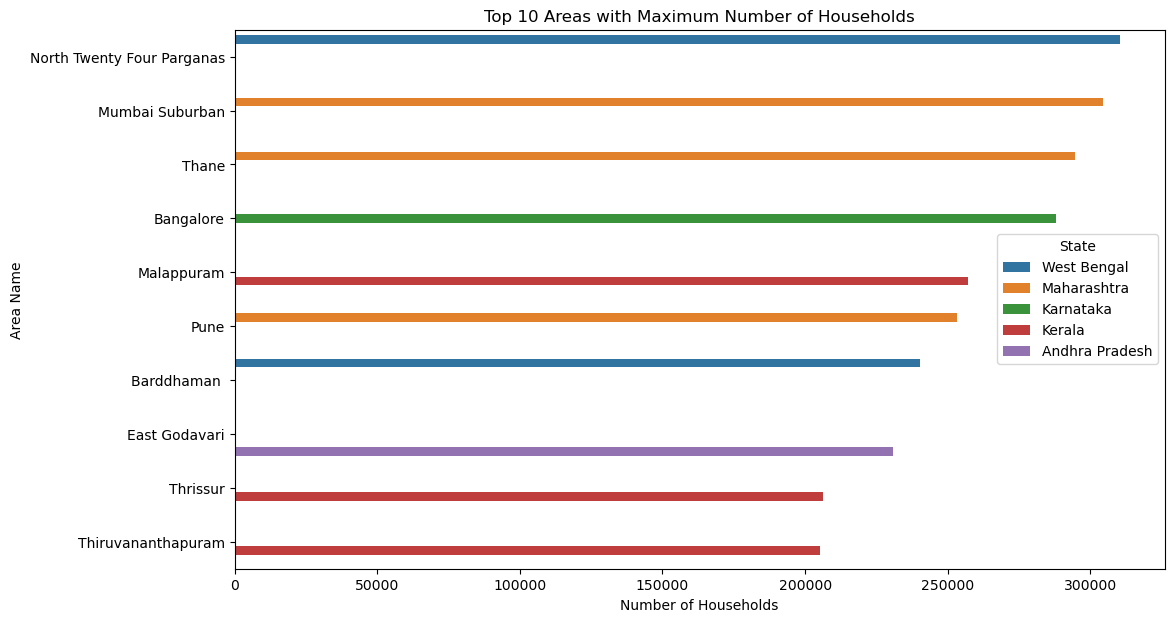

In [22]:
max_households = df.groupby(['State', 'Area Name'])['No_HH'].max().reset_index()

# Sorting values and selecting the top 10
top_10 = max_households.sort_values(by='No_HH', ascending=False).head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='No_HH', y='Area Name', hue='State', data=top_10)
plt.title('Top 10 Areas with Maximum Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Area Name')
plt.show()

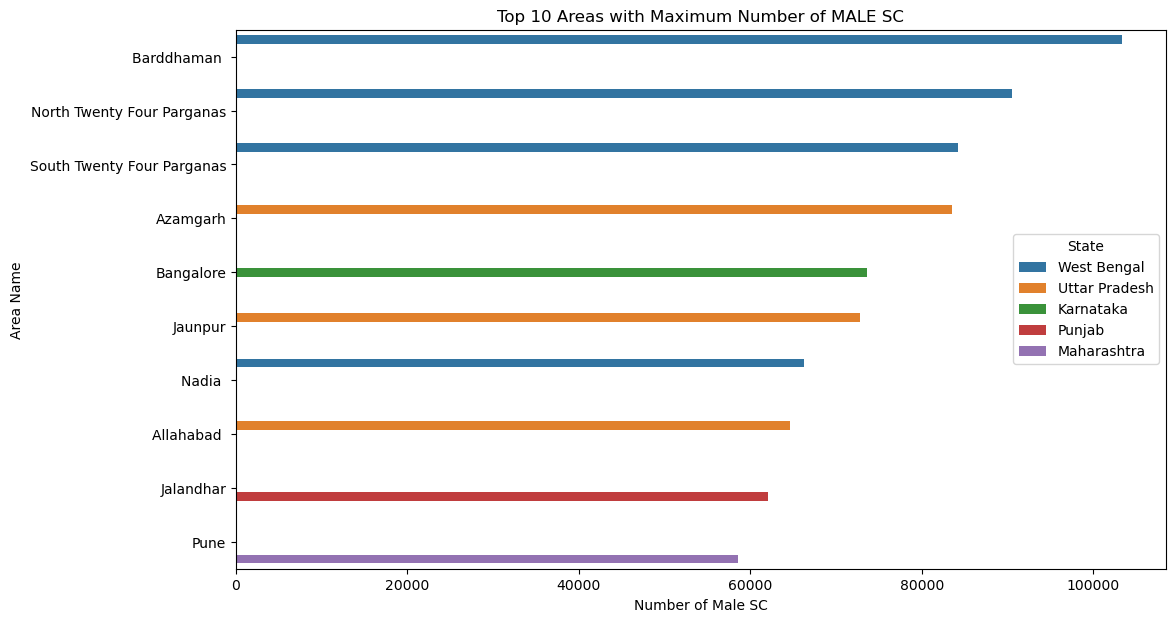

In [23]:
max_malesc = df.groupby(['State', 'Area Name'])['M_SC'].max().reset_index()


top_10 = max_malesc.sort_values(by='M_SC', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='M_SC', y='Area Name', hue='State', data=top_10)
plt.title('Top 10 Areas with Maximum Number of MALE SC')
plt.xlabel('Number of Male SC')
plt.ylabel('Area Name')
plt.show()

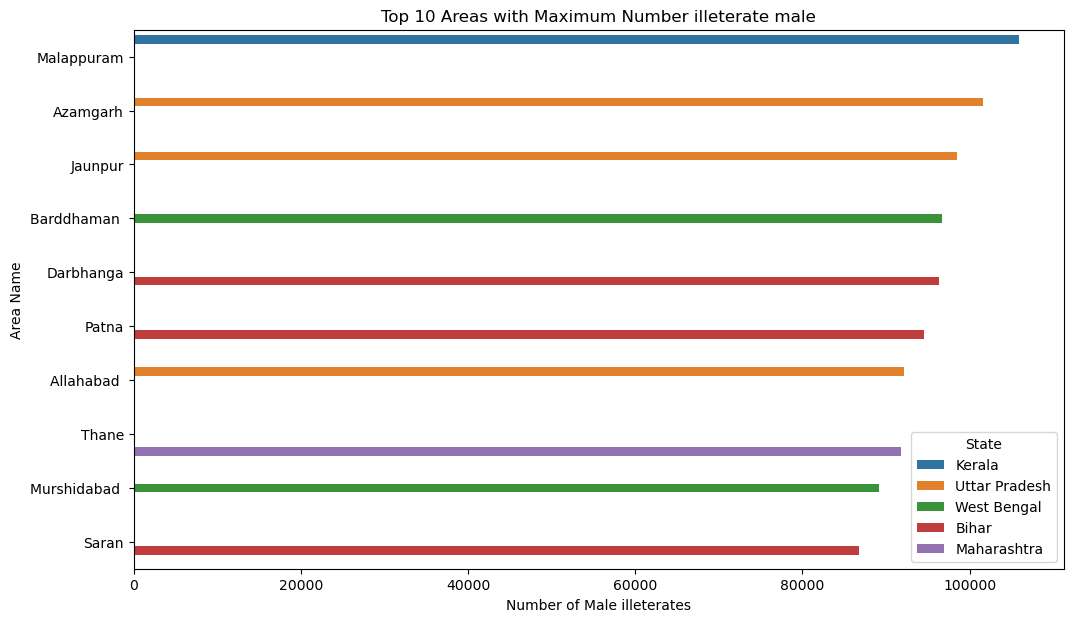

In [24]:
illeterate_male = df.groupby(['State', 'Area Name'])['M_ILL'].max().reset_index()


top_10 = illeterate_male.sort_values(by='M_ILL', ascending=False).head(10)


plt.figure(figsize=(12, 7))
sns.barplot(x='M_ILL', y='Area Name', hue='State', data=top_10)
plt.title('Top 10 Areas with Maximum Number illeterate male')
plt.xlabel('Number of Male illeterates')
plt.ylabel('Area Name')
plt.show()

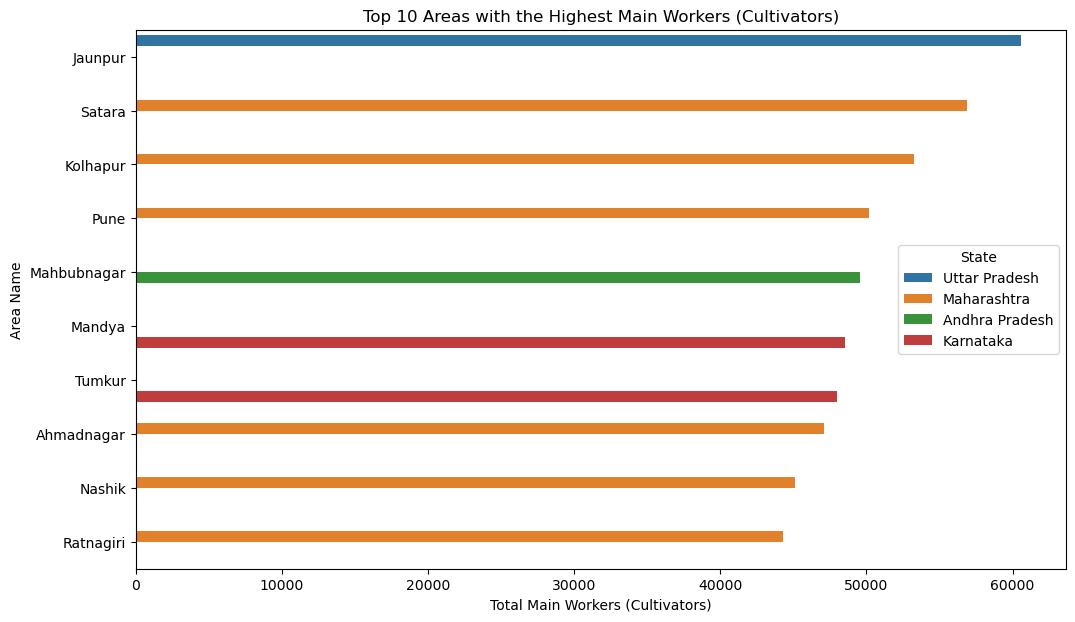

In [25]:

# Grouping by 'State' and 'Area Name' and finding the sum of MAIN_CL_M and MAIN_CL_F
main_workers = df.groupby(['State', 'Area Name'])['MAIN_CL_M', 'MAIN_CL_F'].sum().reset_index()

# Calculating the total main workers (male + female)
main_workers['Total_MAIN_CL'] = main_workers['MAIN_CL_M'] + main_workers['MAIN_CL_F']

# Sorting values and selecting the top 10
top_10_main_workers = main_workers.sort_values(by='Total_MAIN_CL', ascending=False).head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Total_MAIN_CL', y='Area Name', hue='State', data=top_10_main_workers)
plt.title('Top 10 Areas with the Highest Main Workers (Cultivators)')
plt.xlabel('Total Main Workers (Cultivators)')
plt.ylabel('Area Name')
plt.show()

# Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

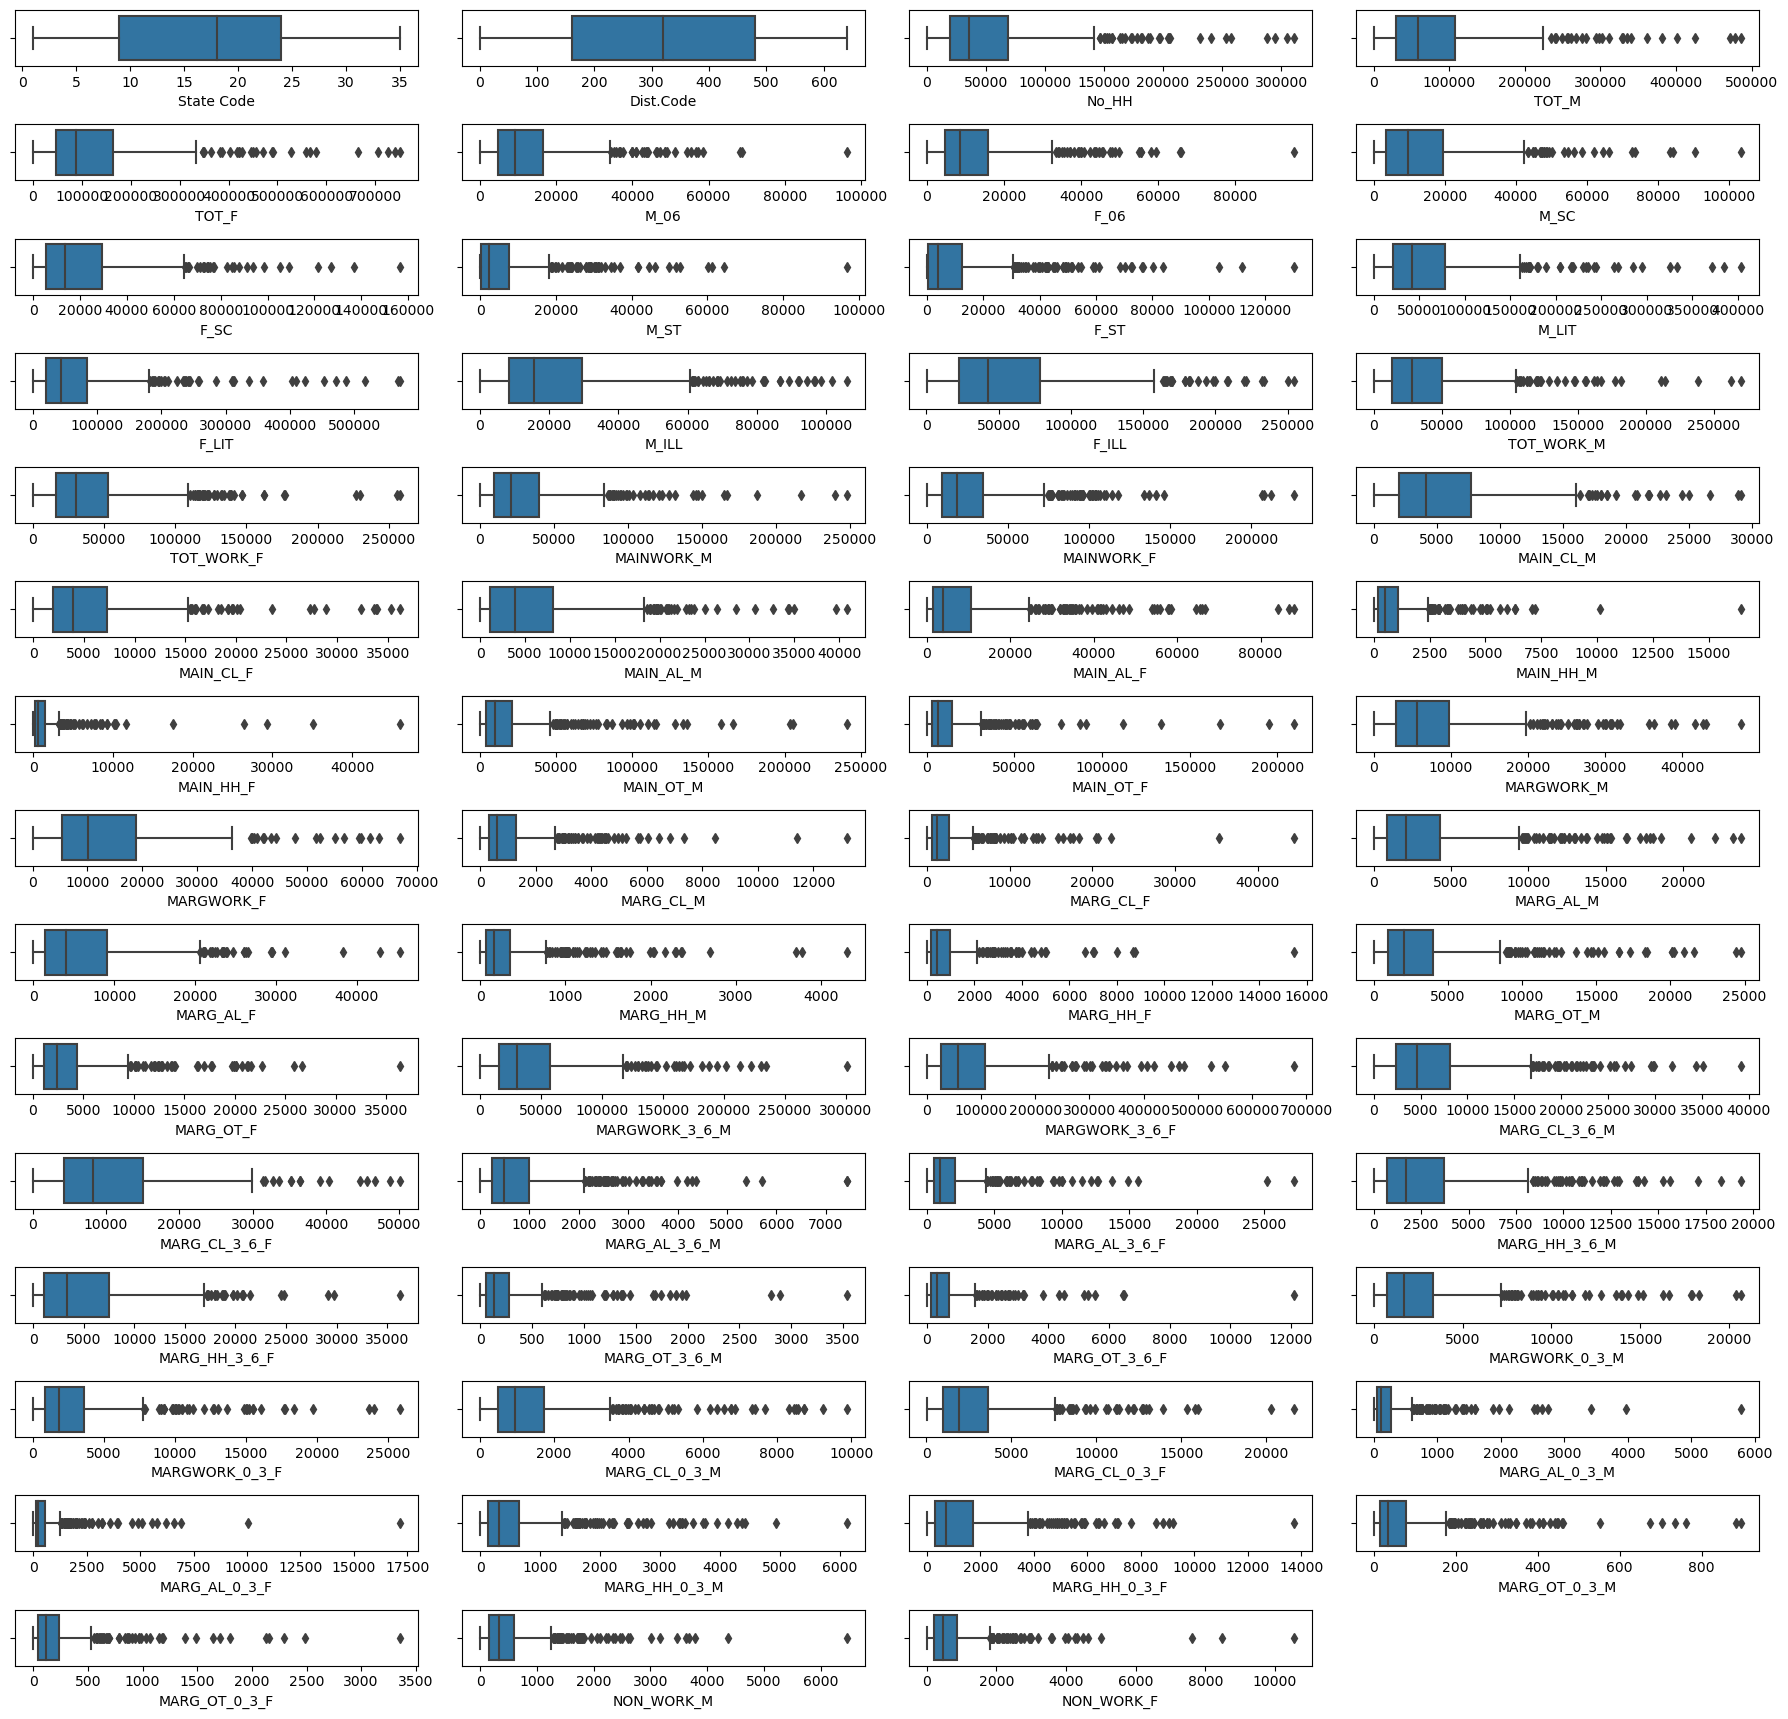

In [26]:
# visualising the outliers 

clust_num_col = df.select_dtypes(['int64', 'float64']).columns
num_plots = len(clust_num_col)

num_rows = 16
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
axes = axes.flatten()

for i in range(num_plots):
    sns.boxplot(x=df[clust_num_col[i]], ax=axes[i])
    axes[i].set_xlabel(clust_num_col[i])

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### we choose to treat the outliers as they have huge impact on pca if not treated 

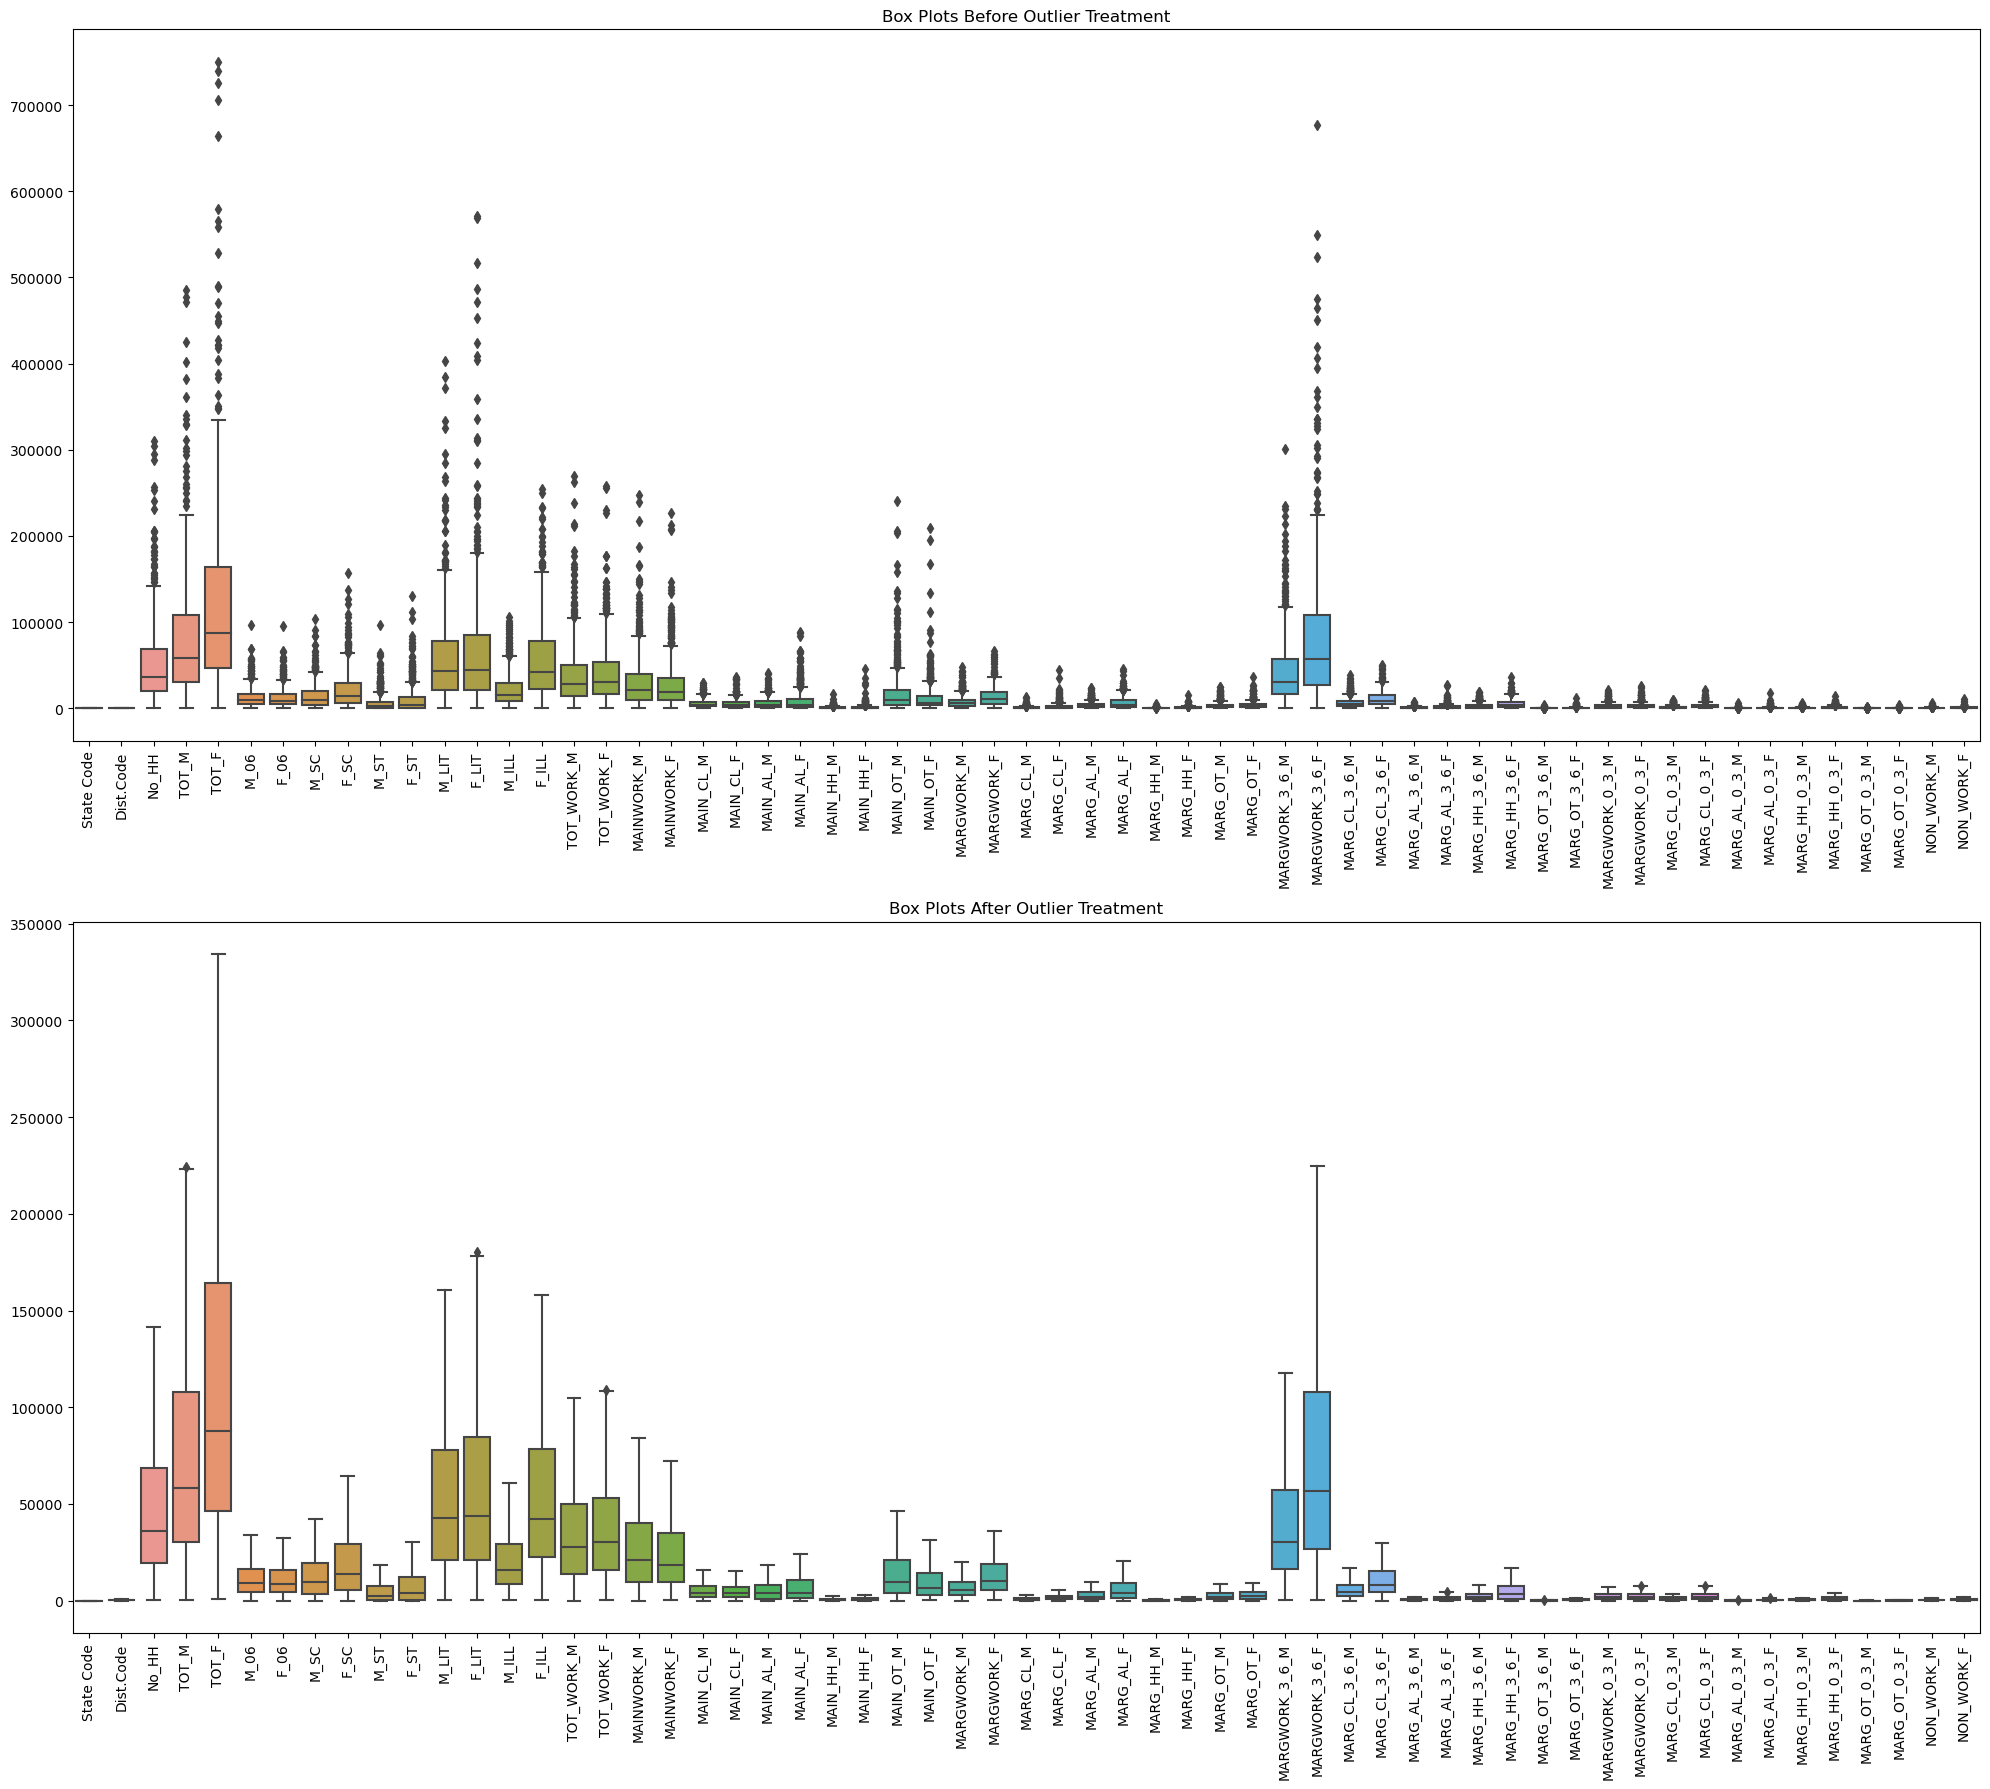

In [27]:
 def treat_outlier(x):
   
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    
    IQR = q75 - q25
    lower_bound = q25 - (1.5 * IQR)
    upper_bound = q75 + (1.5 * IQR)
    return x.apply(lambda y: q25 if y < lower_bound else y).apply(lambda y: q75 if y > upper_bound else y)


# lets create a copy of the original DataFrame and apply outliers treatment to that .
df_copy = df.copy()

attributes_with_outliers = df.select_dtypes(include=['int64', 'float64']).columns
attributes_without_outliers = df_copy.select_dtypes(include=['int64', 'float64']).columns

# lets create a copy of the original DataFrame and apply outliers treatment to that .
df_copy = df.copy()

# Increasing the size 
plt.figure(figsize=(20, 18))

# Before outlier treatment
plt.subplot(2, 1, 1)
sns.boxplot(data=df[attributes_with_outliers])
plt.title('Box Plots Before Outlier Treatment')
plt.xticks(rotation=90)

# Applying outlier treatment to the copy
df_copy[attributes_without_outliers] = df_copy[attributes_with_outliers].apply(treat_outlier)

# After outlier treatment
plt.subplot(2, 1, 2)
sns.boxplot(data=df_copy[attributes_with_outliers])
plt.title('Box Plots After Outlier Treatment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [28]:
from scipy.stats import zscore

In [29]:
#attributes_without_outliers # checking 

In [30]:
#attributes_with_outliers # checking 

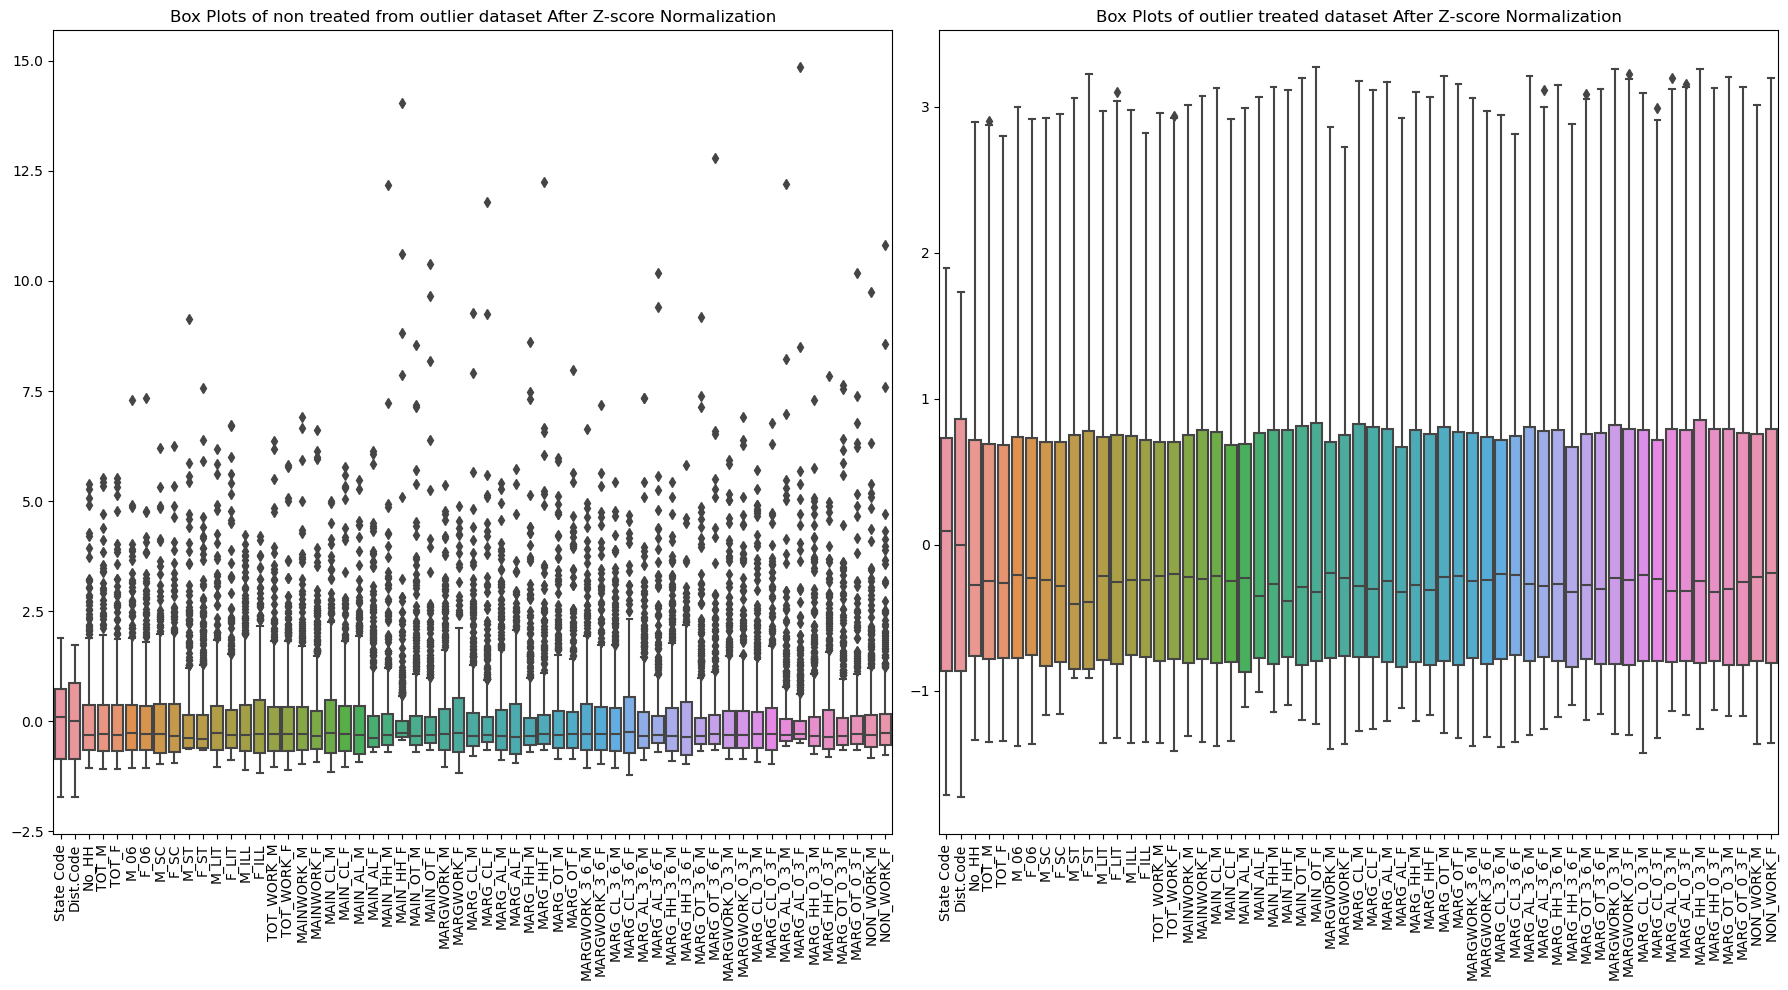

In [31]:
df_zscore = df_copy.copy()
df_zscore[attributes_without_outliers] = zscore(df_copy[attributes_without_outliers])


df_nontreated = df.copy()
df_nontreated[attributes_with_outliers] = zscore(df[attributes_with_outliers])

# Visualize box plots before and after Z-score normalization
plt.figure(figsize=(18, 10))



plt.subplot(1, 2, 1)
sns.boxplot(data=df_nontreated[attributes_with_outliers])
plt.title('Box Plots of non treated from outlier dataset After Z-score Normalization')
plt.xticks(rotation=90)


# After Z-score normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=df_zscore[attributes_with_outliers])
plt.title('Box Plots of outlier treated dataset After Z-score Normalization')
plt.xticks(rotation=90)

plt.tight_layout()

### there is significant change in untreated dataset and treated data set after z score scaling hence it will have an impact on further machine learning techniques like PCA 

# Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [32]:
df1 = df.select_dtypes(include=["int64", "float64"])
df1

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


In [33]:
feature_list = df1.columns

In [34]:
#Defining function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [35]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df1[i])
    df1[i] = np.where(df1[i] > UL, UL, df1[i])
    df1[i] = np.where(df1[i] < LL, LL, df1[i])

In [36]:
from scipy.stats import zscore

In [37]:
df_scaled= df1.apply(zscore)
df_scaled

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.710782,-1.723934,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.710782,-1.718521,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.710782,-1.713109,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-1.710782,-1.707696,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.792730,1.707696,-1.150348,-1.127949,-1.132667,-1.134720,-1.117495,-1.078725,-1.078324,-0.842834,...,-1.212628,-1.195666,-1.005714,-1.028083,-1.070466,-1.014472,-1.026779,-1.051594,-1.102220,-1.102051
636,1.792730,1.713109,-0.965024,-1.058299,-1.025046,-1.091676,-1.080734,-0.897218,-0.852926,-0.842834,...,-1.089513,-1.057365,-0.989649,-0.992362,-0.981393,-0.900575,-0.953855,-0.904293,-0.893509,-0.861070
637,1.898897,1.718521,-1.202745,-1.237690,-1.232045,-1.234110,-1.226443,-1.080447,-1.079963,-0.674559,...,-1.140561,-1.154175,-0.957519,-1.017877,-1.065778,-1.009215,-0.716851,-0.750587,-0.984485,-1.043275
638,1.898897,1.723934,-1.139425,-1.177029,-1.173597,-1.180468,-1.177539,-1.080447,-1.079963,-0.838178,...,-1.108531,-1.136053,-0.877193,-0.915817,-1.044682,-0.996073,-1.008548,-1.025976,-0.920267,-0.992336


# Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [38]:
df_scaled.corr()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
State Code,1.000000,0.993021,0.402752,0.160430,0.279790,0.042674,0.056761,0.062590,0.169449,0.318886,...,-0.077282,0.045344,-0.360774,-0.343628,-0.054833,0.121602,-0.043374,0.059002,0.122895,0.244328
Dist.Code,0.993021,1.000000,0.395729,0.159112,0.277518,0.048107,0.063732,0.055070,0.162027,0.313170,...,-0.077552,0.043718,-0.369384,-0.352906,-0.038158,0.137344,-0.028434,0.067978,0.110493,0.225646
No_HH,0.402752,0.395729,1.000000,0.911273,0.971493,0.811586,0.808618,0.805452,0.857220,0.116118,...,0.603998,0.616179,0.092253,0.076631,0.436649,0.492540,0.602131,0.651742,0.767201,0.796637
TOT_M,0.160430,0.159112,0.911273,1.000000,0.978590,0.963536,0.958653,0.875787,0.860357,0.023402,...,0.738510,0.636778,0.233602,0.192371,0.538957,0.482988,0.757329,0.731686,0.864812,0.789481
TOT_F,0.279790,0.277518,0.971493,0.978590,1.000000,0.912989,0.909743,0.856324,0.875066,0.076070,...,0.696030,0.651531,0.184873,0.155304,0.505449,0.507235,0.701268,0.710765,0.838335,0.813369
M_06,0.042674,0.048107,0.811586,0.963536,0.912989,1.000000,0.997471,0.832042,0.795549,-0.006072,...,0.797828,0.682599,0.352897,0.307174,0.620361,0.531701,0.796717,0.740906,0.828240,0.733186
F_06,0.056761,0.063732,0.808618,0.958653,0.909743,0.997471,1.000000,0.822600,0.788809,0.006793,...,0.803792,0.688037,0.356348,0.309914,0.639603,0.546740,0.807559,0.752439,0.823705,0.731812
M_SC,0.062590,0.055070,0.805452,0.875787,0.856324,0.832042,0.822600,1.000000,0.983150,-0.096762,...,0.646686,0.553418,0.189561,0.154614,0.493635,0.443115,0.692183,0.658905,0.757611,0.686856
F_SC,0.169449,0.162027,0.857220,0.860357,0.875066,0.795549,0.788809,0.983150,1.000000,-0.052776,...,0.619080,0.571789,0.154463,0.127956,0.479470,0.475208,0.655130,0.652278,0.733376,0.703948
M_ST,0.318886,0.313170,0.116118,0.023402,0.076070,-0.006072,0.006793,-0.096762,-0.052776,1.000000,...,0.094751,0.201904,0.092473,0.093339,0.161449,0.274170,-0.027682,-0.014108,0.068555,0.169102


In [39]:
from factor_analyzer import FactorAnalyzer

In [40]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

In [41]:
#Confirm the adequacy of sample size.
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

C:\Users\91888\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9355078191216315

In [42]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=59, random_state=123)
pca_transformed = pca.fit_transform(df_scaled)

In [43]:
#create covariance matrix
pd.DataFrame(np.round(pca.get_covariance(),2),columns=df_scaled.columns,index=df_scaled.columns)

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
State Code,1.00,0.99,0.40,0.16,0.28,0.04,0.06,0.06,0.17,0.32,...,-0.08,0.05,-0.36,-0.34,-0.05,0.12,-0.04,0.06,0.12,0.24
Dist.Code,0.99,1.00,0.40,0.16,0.28,0.05,0.06,0.06,0.16,0.31,...,-0.08,0.04,-0.37,-0.35,-0.04,0.14,-0.03,0.07,0.11,0.23
No_HH,0.40,0.40,1.00,0.91,0.97,0.81,0.81,0.81,0.86,0.12,...,0.60,0.62,0.09,0.08,0.44,0.49,0.60,0.65,0.77,0.80
TOT_M,0.16,0.16,0.91,1.00,0.98,0.97,0.96,0.88,0.86,0.02,...,0.74,0.64,0.23,0.19,0.54,0.48,0.76,0.73,0.87,0.79
TOT_F,0.28,0.28,0.97,0.98,1.00,0.91,0.91,0.86,0.88,0.08,...,0.70,0.65,0.19,0.16,0.51,0.51,0.70,0.71,0.84,0.81
M_06,0.04,0.05,0.81,0.97,0.91,1.00,1.00,0.83,0.80,-0.01,...,0.80,0.68,0.35,0.31,0.62,0.53,0.80,0.74,0.83,0.73
F_06,0.06,0.06,0.81,0.96,0.91,1.00,1.00,0.82,0.79,0.01,...,0.81,0.69,0.36,0.31,0.64,0.55,0.81,0.75,0.82,0.73
M_SC,0.06,0.06,0.81,0.88,0.86,0.83,0.82,1.00,0.98,-0.10,...,0.65,0.55,0.19,0.15,0.49,0.44,0.69,0.66,0.76,0.69
F_SC,0.17,0.16,0.86,0.86,0.88,0.80,0.79,0.98,1.00,-0.05,...,0.62,0.57,0.15,0.13,0.48,0.48,0.66,0.65,0.73,0.71
M_ST,0.32,0.31,0.12,0.02,0.08,-0.01,0.01,-0.10,-0.05,1.00,...,0.09,0.20,0.09,0.09,0.16,0.27,-0.03,-0.01,0.07,0.17


In [44]:
#Extract eigen vectors
eigen_vector=pca.components_
print('Eigenvectors:',np.round(eigen_vector,2))

Eigenvectors: [[ 0.03  0.03  0.15 ...  0.14  0.15  0.14]
 [-0.17 -0.17 -0.12 ...  0.04 -0.04 -0.04]
 [ 0.3   0.31  0.07 ... -0.07 -0.11 -0.02]
 ...
 [ 0.   -0.    0.   ... -0.01  0.06 -0.01]
 [ 0.   -0.   -0.   ...  0.01 -0.08 -0.  ]
 [-0.    0.   -0.   ...  0.    0.01  0.  ]]


In [45]:
#Check the eigen values
eigen_values= pca.explained_variance_
print('Eigenvalues:',np.round(eigen_values,2))

Eigenvalues: [3.571e+01 7.990e+00 4.510e+00 2.780e+00 1.970e+00 1.180e+00 1.130e+00
 7.200e-01 4.600e-01 3.500e-01 3.100e-01 2.700e-01 2.200e-01 1.800e-01
 1.700e-01 1.300e-01 1.300e-01 1.000e-01 1.000e-01 9.000e-02 8.000e-02
 7.000e-02 6.000e-02 5.000e-02 5.000e-02 4.000e-02 3.000e-02 3.000e-02
 3.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]


# Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [46]:
exp_var=np.round(pca.explained_variance_ratio_,2)*100
exp_var

array([60., 14.,  8.,  5.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

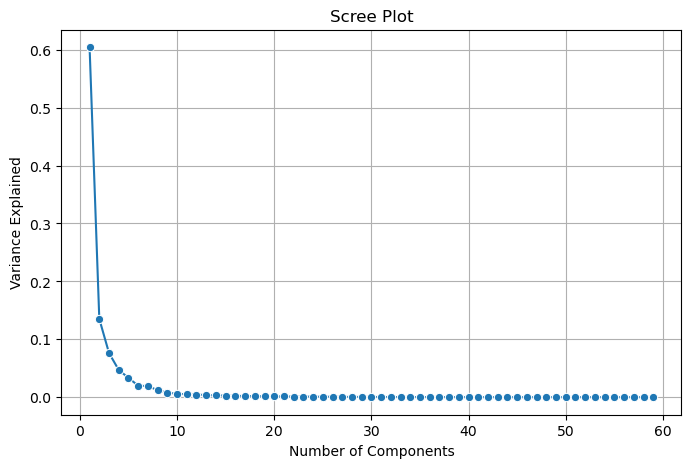

In [47]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,60),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

### We have to consider atleast 90% of expplained variance. As the explained variance ratio and the screeplot show, the optimum number of PC is 6.

# Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [48]:
# Apply PCA for the number of decided components to get the loadings and component output

from sklearn.decomposition import PCA
pca = PCA(n_components=6,random_state=123)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose()

array([[-5.63117867, -5.59473229, -7.57169249, ..., -7.76859947,
        -7.74649916, -7.29779378],
       [ 1.05458348,  0.57863634,  0.29689193, ..., -1.61668024,
        -1.61321115, -2.00869868],
       [-2.12220845, -2.68531265, -1.12751488, ...,  0.30520683,
         0.33621387,  0.24852805],
       [-1.28166329, -1.76386269,  0.03001139, ..., -1.29696138,
        -0.83908148, -0.73655363],
       [ 0.15937091, -0.09739725,  0.13331924, ...,  0.8399054 ,
         0.60975333,  0.76250372],
       [-1.05275813,  0.53663511, -0.76614936, ...,  1.30153251,
         0.94490365,  0.80230521]])

In [49]:
#Creating a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],index = df_scaled.columns)
df_extracted_loadings.shape

(59, 6)

In [50]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
State Code,0.030369,-0.172197,0.301347,0.000705,0.150191,0.247414
Dist.Code,0.030344,-0.169017,0.306418,-0.021726,0.134957,0.244014
No_HH,0.149578,-0.119692,0.068243,0.079420,-0.027566,-0.030231
TOT_M,0.159043,-0.070203,-0.059847,0.053010,-0.046639,-0.109570
TOT_F,0.158310,-0.090756,0.002988,0.071231,-0.032287,-0.073524
M_06,0.155991,-0.008429,-0.083250,0.027788,-0.077506,-0.139006
F_06,0.156488,-0.003740,-0.074635,0.015675,-0.074457,-0.125977
M_SC,0.143091,-0.065874,-0.072860,0.011447,-0.176436,-0.079702
F_SC,0.143477,-0.079867,-0.016494,0.018471,-0.169565,-0.041946
M_ST,0.019381,0.037398,0.306361,0.096905,0.331960,-0.134892


# Part 2 - PCA: Write linear equation for first PC.

In [51]:
for i in range(0,59):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_scaled.columns[i], end=' + ')

( 0.03 ) * State Code + ( 0.03 ) * Dist.Code + ( 0.15 ) * No_HH + ( 0.16 ) * TOT_M + ( 0.16 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.14 ) * M_SC + ( 0.14 ) * F_SC + ( 0.02 ) * M_ST + ( 0.02 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.15 ) * M_ILL + ( 0.16 ) * F_ILL + ( 0.15 ) * TOT_WORK_M + ( 0.14 ) * TOT_WORK_F + ( 0.14 ) * MAINWORK_M + ( 0.13 ) * MAINWORK_F + ( 0.11 ) * MAIN_CL_M + ( 0.08 ) * MAIN_CL_F + ( 0.12 ) * MAIN_AL_M + ( 0.09 ) * MAIN_AL_F + ( 0.14 ) * MAIN_HH_M + ( 0.13 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.12 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.15 ) * MARGWORK_F + ( 0.09 ) * MARG_CL_M + ( 0.06 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.12 ) * MARG_AL_F + ( 0.14 ) * MARG_HH_M + ( 0.14 ) * MARG_HH_F + ( 0.15 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.16 ) * MARG_CL_3_6_M + ( 0.15 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.07 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) 